<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/08_pytorch_paper_replicating_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08. PyTorch Experiment Tracking Exercises

Welcome to the 08. PyTorch Paper Replicating exercises.

Your objective is to write code to satisify each of the exercises below.

Some starter code has been provided to make sure you have all the resources you need.

> **Note:** There may be more than one solution to each of the exercises.

## Resources

1. These exercises/solutions are based on [section 08. PyTorch Paper Replicating](https://www.learnpytorch.io/08_pytorch_paper_replicating/) of the Learn PyTorch for Deep Learning course by Zero to Mastery.
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/tjpW_BY8y3g) (but try the exercises yourself first!).
3. See [all solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

> **Note:** The first section of this notebook is dedicated to getting various helper functions and datasets used for the exercises. The exercises start at the heading "Exercise 1: ...".

### Get various imports and helper functions

The code in the following cells prepares imports and data for the exercises below. They are taken from [08. PyTorch Paper Replicating](https://www.learnpytorch.io/08_pytorch_paper_replicating/). 

In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
#try:
#    import torch
#    import torchvision
#    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
#    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
#    print(f"torch version: {torch.__version__}")
#    print(f"torchvision version: {torchvision.__version__}")
#except:
#    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
#    !pip3 install -U --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cu113
#    import torch
#    import torchvision
#    print(f"torch version: {torch.__version__}")
#    print(f"torchvision version: {torchvision.__version__}")

In [2]:
# Continue with regular imports
#import matplotlib.pyplot as plt
#import torch
#import torchvision

#from torch import nn
#from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
#try:
#    from torchinfo import summary
#except:
#    print("[INFO] Couldn't find torchinfo... installing it.")
#    !pip install -q torchinfo
#    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
#try:
#    from going_modular.going_modular import data_setup, engine
#    from helper_functions import download_data, set_seeds, plot_loss_curves
#except:
#    # Get the going_modular scripts
#    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
#    !git clone https://github.com/mrdbourke/pytorch-deep-learning
#    !mv pytorch-deep-learning/going_modular .
#    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
#    !rm -rf pytorch-deep-learning
#    from going_modular.going_modular import data_setup, engine
#    from helper_functions import download_data, set_seeds, plot_loss_curves

In [1]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    #from going_modular.going_modular import data_setup, engine
    #from helper_functions import download_data, set_seeds, plot_loss_curves
    from going_modular.sergio.pytorch import data_setup, engine, helper_functions
    from going_modular.sergio.pytorch.helper_functions import download_data, set_seeds, plot_loss_curves
    #print("Entering...")
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    #!git clone https://github.com/mrdbourke/pytorch-deep-learning
    #!mv pytorch-deep-learning/going_modular .
    #!mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    #!rm -rf pytorch-deep-learning
    #from going_modular.going_modular import data_setup, engine
    #from helper_functions import download_data, set_seeds, plot_loss_curves
    import shutil
    import os
    from pathlib import Path
    import stat
    image_path = Path("going_modular/sergio")    
    if image_path.is_dir():
        print(f"[INFO] {image_path} directory exists.")
    else:
        print(f"[INFO] Did not find {image_path} directory, creating one...")
        image_path.mkdir(parents=True, exist_ok=True)
    !git clone https://github.com/sergio-sanz-rodriguez/custom_python_functions.git
    shutil.move("custom_python_functions/pytorch", "going_modular/sergio") 
    from going_modular.sergio.pytorch import data_setup, engine, helper_functions
    from going_modular.sergio.pytorch.helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.
[INFO] Did not find going_modular\sergio directory, creating one...


Cloning into 'custom_python_functions'...


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Get data

Want to download the data we've been using in PyTorch Paper Replicating: https://www.learnpytorch.io/08_pytorch_paper_replicating/#1-get-data

In [3]:
# Download pizza, steak, sushi images from GitHub
image_path = helper_functions.download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data\pizza_steak_sushi directory exists, skipping download.


WindowsPath('data/pizza_steak_sushi')

In [4]:
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

### Preprocess data

Turn images into tensors using same code as PyTorch Paper Replicating section 2.1 and 2.2: https://www.learnpytorch.io/08_pytorch_paper_replicating/#21-prepare-transforms-for-images

In [5]:
# Create image size (from Table 3 in the ViT paper) 
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])           
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [6]:
# Set the batch size
BATCH_SIZE = 32 # this is lower than the ViT paper but it's because we're starting small

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    train_transform=manual_transforms, # use manually created transforms
    test_transform=manual_transforms,
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x23d9563b190>,
 ['pizza', 'steak', 'sushi'])

In [9]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(2))

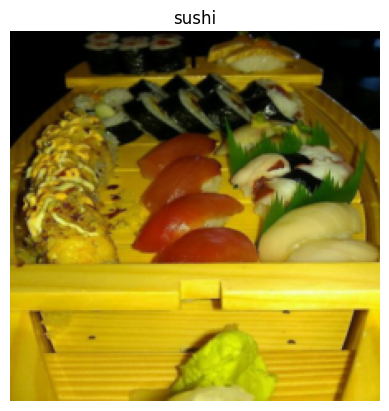

In [10]:
# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

## 1. Replicate the ViT architecture we created with in-built [PyTorch transformer layers](https://pytorch.org/docs/stable/nn.html#transformer-layers).

* You'll want to look into replacing our `TransformerEncoderBlock()` class with [`torch.nn.TransformerEncoderLayer()`](https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoderLayer.html#torch.nn.TransformerEncoderLayer) (these contain the same layers as our custom blocks). 
* You can stack `torch.nn.TransformerEncoderLayer()`'s on top of each other with [`torch.nn.TransformerEncoder()`](https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoder.html#torch.nn.TransformerEncoder).

In [11]:
# TODO: your code
# Already done

## 2. Turn the custom ViT architecture we created into a Python script, for example, `vit.py`.

* You should be able to import an entire ViT model using something like`from vit import ViT`.
* We covered the art of turning code cells into Python scrips in [05. PyTorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/). 


In [12]:
from going_modular.sergio.pytorch.vision_transformer import ViT, ViTv2

vit = ViT(
    img_size=224,
    in_channels=3,
    patch_size=16,
    num_transformer_layers=12,
    embedding_dim=768,
    mlp_size=3072,
    num_heads=12,
    attn_dropout=0,
    mlp_dropout=0.1,
    embedding_dropout=0.1,
    num_classes=len(class_names)
)

demo_img = torch.randn(1, 3, 224, 224).to(device)
print(demo_img.shape) 

# Create ViT
vit = ViT(num_classes=len(class_names)).to(device)
vit(demo_img)

torch.Size([1, 3, 224, 224])


tensor([[-0.2130,  0.0017, -0.1499]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [13]:
# Get a summary of the input and outputs of PatchEmbedding (uncomment for full output)
summary(model=vit,
         input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
         # col_names=["input_size"], # uncomment for smaller output
         col_names=["input_size", "output_size", "num_params", "trainable"],
         col_width=20,
         row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                    [32, 3, 224, 224]    [32, 3]              --                   True
├─PatchEmbedding (patch_embedding)                           [32, 3, 224, 224]    [32, 197, 768]       152,064              True
│    └─Conv2d (patcher)                                      [32, 3, 224, 224]    [32, 768, 14, 14]    590,592              True
│    └─Flatten (flatten)                                     [32, 768, 14, 14]    [32, 768, 196]       --                   --
├─Dropout (embedding_dropout)                                [32, 197, 768]       [32, 197, 768]       --                   --
├─Sequential (transformer_encoder)                           [32, 197, 768]       [32, 197, 768]       --                   True
│    └─TransformerEncoderBlock (0)                           [32, 197, 768]       [32, 197, 768]

## 3. Train a pretrained ViT feature extractor model (like the one we made in [08. PyTorch Paper Replicating section 10](https://www.learnpytorch.io/08_pytorch_paper_replicating/#10-bring-in-pretrained-vit-from-torchvisionmodels-on-same-dataset)) on 20% of the pizza, steak and sushi data like the dataset we used in [07. PyTorch Experiment Tracking section 7.3](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#73-download-different-datasets) 
* See how it performs compared to the EffNetB2 model we compared it to in [08. PyTorch Paper Replicating section 10.6](https://www.learnpytorch.io/08_pytorch_paper_replicating/#106-save-feature-extractor-vit-model-and-check-file-size).

In [7]:
from torchvision.transforms import v2

# Download pizza, steak, sushi images from GitHub
image_path_20p = helper_functions.download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi_20_percent")

# Setup directory paths to train and test images
train_dir_20p = image_path_20p / "train"
test_dir_20p = image_path_20p / "test"

# Create image size (from Table 3 in the ViT paper) 
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = v2.Compose([
    v2.Resize((IMG_SIZE, IMG_SIZE)),
    v2.ToImage(), v2.ToDtype(torch.float32, scale=True),
    #v2.Normalize(mean=[0.485, 0.456, 0.406],
    #             std=[0.229, 0.224, 0.225]) 
])

print(f"Manually created transforms: {manual_transforms}")

[INFO] data\pizza_steak_sushi_20_percent directory exists, skipping download.
Manually created transforms: Compose(
      Resize(size=[224, 224], interpolation=InterpolationMode.BILINEAR, antialias=True)
      ToImage()
      ToDtype(scale=True)
)


In [8]:
# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir_20p,
    test_dir=test_dir_20p,
    train_transform=manual_transforms, # use manually created transforms
    test_transform=manual_transforms,
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x23d95663ad0>,
 ['pizza', 'steak', 'sushi'])

In [16]:
# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=3e-3, # Base LR from Table 3 for ViT-* ImageNet-1k
                             betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                             weight_decay=0.3) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Create writer
summary_writer = engine.create_writer(experiment_name="data_20_percent",
                               model_name="vit",
                               extra="20_epochs")
# Set the seeds
helper_functions.set_seeds()

# Train the model and save the training results to a dictionary
results = engine.train(model=vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=20,
                       device=device,
                       writer=summary_writer)

[INFO] Created SummaryWriter, saving to: runs\2024-11-24\data_20_percent\vit\20_epochs...


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.3365 | train_acc: 0.3333 | test_loss: 1.2611 | test_acc: 0.3074
Epoch: 2 | train_loss: 1.1783 | train_acc: 0.3125 | test_loss: 1.4866 | test_acc: 0.3131
Epoch: 3 | train_loss: 1.1803 | train_acc: 0.3521 | test_loss: 1.1399 | test_acc: 0.2989
Epoch: 4 | train_loss: 1.1283 | train_acc: 0.2854 | test_loss: 1.2337 | test_acc: 0.3159
Epoch: 5 | train_loss: 1.1153 | train_acc: 0.3771 | test_loss: 1.1444 | test_acc: 0.3824
Epoch: 6 | train_loss: 1.1402 | train_acc: 0.3167 | test_loss: 1.2636 | test_acc: 0.3045
Epoch: 7 | train_loss: 1.1289 | train_acc: 0.3812 | test_loss: 1.1540 | test_acc: 0.3131
Epoch: 8 | train_loss: 1.1359 | train_acc: 0.2917 | test_loss: 1.0950 | test_acc: 0.3881
Epoch: 9 | train_loss: 1.1315 | train_acc: 0.3375 | test_loss: 1.1172 | test_acc: 0.3852
Epoch: 10 | train_loss: 1.1440 | train_acc: 0.3042 | test_loss: 1.1091 | test_acc: 0.3102
Epoch: 11 | train_loss: 1.1223 | train_acc: 0.3333 | test_loss: 1.1284 | test_acc: 0.3795
Epoch: 12 | train_l

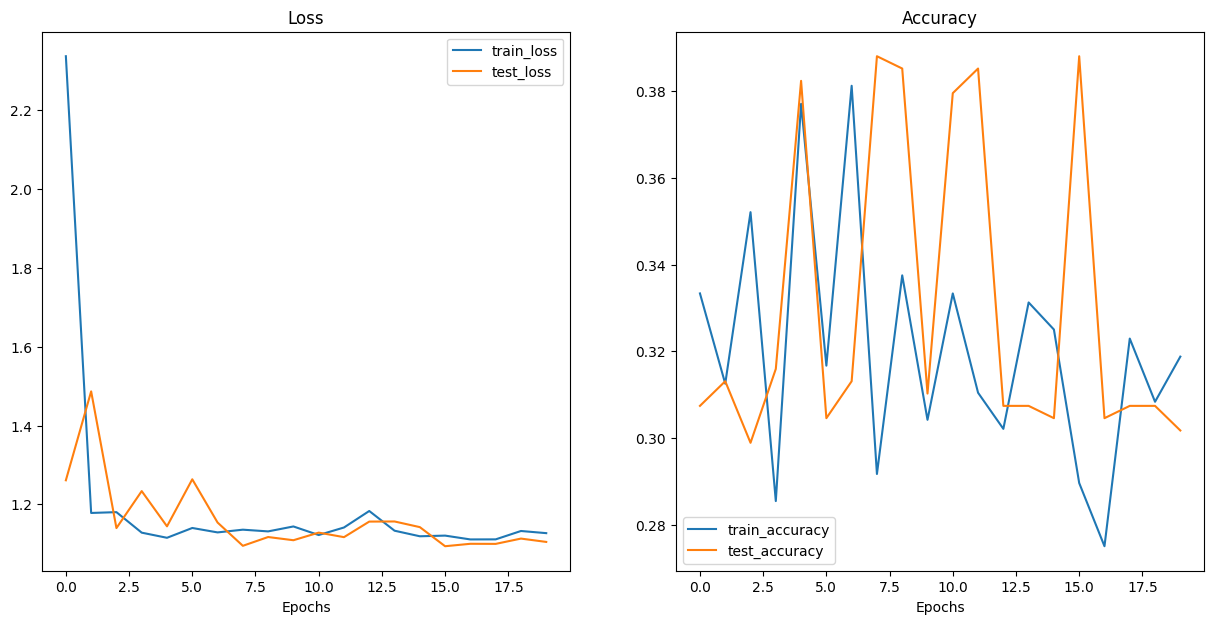

In [17]:
# Plot our ViT model's loss curves
plot_loss_curves(results)

## 4. Try repeating the steps from excercise 3 but this time use the "`ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1`" pretrained weights from [`torchvision.models.vit_b_16()`](https://pytorch.org/vision/stable/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16).
* Note: ViT pretrained with SWAG weights has a minimum input image size of (384, 384), though this is accessible in the weights `.transforms()` method.

In [9]:
def create_vit():
    # 1. Get pretrained weights for ViT-Base
    pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1 # requires torchvision >= 0.13, "DEFAULT" means best available

    # 2. Setup a ViT model instance with pretrained weights
    pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

    # 3. Freeze the base parameters
    for parameter in pretrained_vit.parameters():
        parameter.requires_grad = False

    # 4. Change the classifier head (set the seeds to ensure same initialization with linear head)
    set_seeds()
    pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)
    return pretrained_vit, pretrained_vit_weights.transforms()

pretrained_vit, pretrained_vit_transforms = create_vit()

# Get automatic transforms from pretrained ViT weights
print(pretrained_vit_transforms)

ImageClassification(
    crop_size=[384]
    resize_size=[384]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)


In [10]:
# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir_20p,
    test_dir=test_dir_20p,
    train_transform=pretrained_vit_transforms, # use manually created transforms
    test_transform=pretrained_vit_transforms,
    batch_size=BATCH_SIZE
)

In [20]:
# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=3e-3, # Base LR from Table 3 for ViT-* ImageNet-1k
                             betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                             weight_decay=0.3) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Create writer
summary_writer = engine.create_writer(experiment_name="data_20_percent",
                               model_name="pretrained_vit",
                               extra="20_epochs")
# Set the seeds
set_seeds()

# Train the model and save the training results to a dictionary
results = engine.train(model=pretrained_vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=20,
                       device=device,
                       writer=summary_writer)

[INFO] Created SummaryWriter, saving to: runs\2024-11-24\data_20_percent\pretrained_vit\20_epochs...


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4325 | train_acc: 0.9167 | test_loss: 0.0032 | test_acc: 1.0000
Epoch: 2 | train_loss: 0.0465 | train_acc: 0.9875 | test_loss: 0.0143 | test_acc: 1.0000
Epoch: 3 | train_loss: 0.0177 | train_acc: 0.9938 | test_loss: 0.0042 | test_acc: 1.0000
Epoch: 4 | train_loss: 0.0170 | train_acc: 0.9979 | test_loss: 0.0079 | test_acc: 1.0000
Epoch: 5 | train_loss: 0.0171 | train_acc: 1.0000 | test_loss: 0.0122 | test_acc: 1.0000
Epoch: 6 | train_loss: 0.0181 | train_acc: 1.0000 | test_loss: 0.0105 | test_acc: 1.0000
Epoch: 7 | train_loss: 0.0160 | train_acc: 1.0000 | test_loss: 0.0110 | test_acc: 1.0000
Epoch: 8 | train_loss: 0.0183 | train_acc: 1.0000 | test_loss: 0.0117 | test_acc: 1.0000
Epoch: 9 | train_loss: 0.0191 | train_acc: 1.0000 | test_loss: 0.0107 | test_acc: 1.0000
Epoch: 10 | train_loss: 0.0186 | train_acc: 1.0000 | test_loss: 0.0111 | test_acc: 1.0000
Epoch: 11 | train_loss: 0.0187 | train_acc: 1.0000 | test_loss: 0.0109 | test_acc: 1.0000
Epoch: 12 | train_l

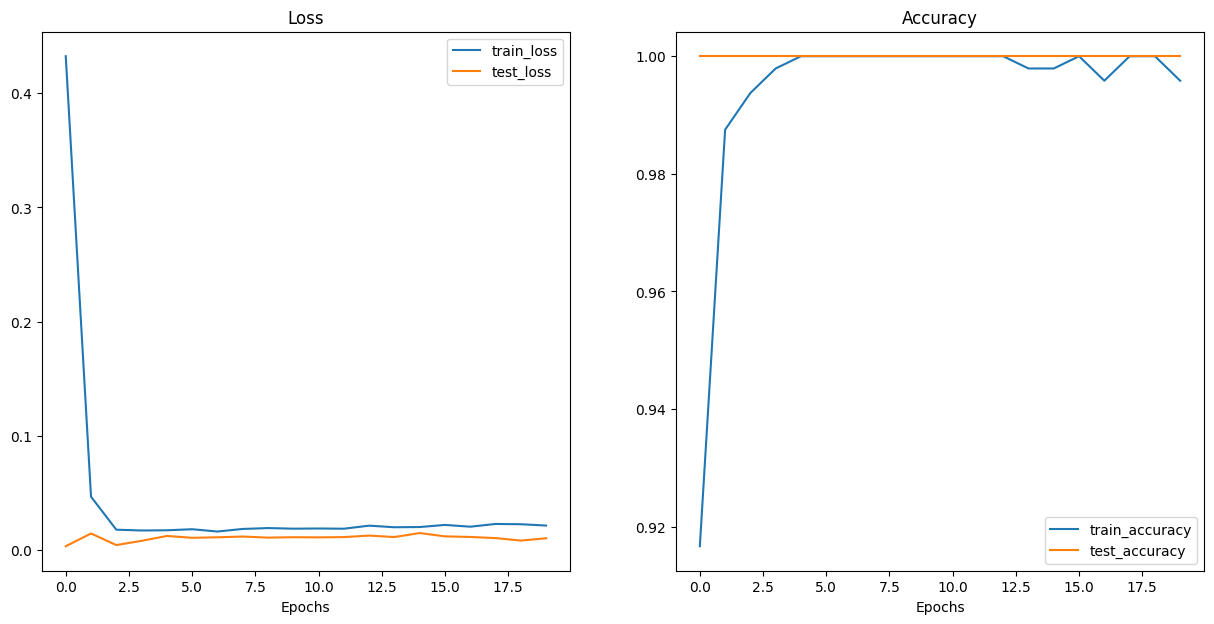

In [21]:
# Plot our ViT model's loss curves
plot_loss_curves(results)

In [11]:
 # 10. Save the model to file so we can get back the best model
model_name="pretrained_vit_swag"
dataloader_name="pizza_steak_sushi_20percent"
epochs=20
save_filepath = f"08_{model_name}_{dataloader_name}_{epochs}_epochs.pth"
helper_functions.save_model(model=pretrained_vit,
                            target_dir="models",
                            model_name=save_filepath)

[INFO] Saving model to: models\08_pretrained_vit_swag_pizza_steak_sushi_20percent_20_epochs.pth


In [12]:
loaded_pretrained_vit, _ = create_vit()
loaded_pretrained_vit = helper_functions.load_model(model=loaded_pretrained_vit,
                                                    model_weights_dir="models",
                                                    model_weights_name=save_filepath)

[INFO] Loading model from: models\08_pretrained_vit_swag_pizza_steak_sushi_20percent_20_epochs.pth


In [13]:
summary(model=loaded_pretrained_vit,
         input_size=(1, 3, 384, 384), # (batch_size, color_channels, height, width)
         # col_names=["input_size"], # uncomment for smaller output
         col_names=["input_size", "output_size", "num_params", "trainable"],
         col_width=20,
         row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 384, 384]     [1, 3]               768                  Partial
├─Conv2d (conv_proj)                                         [1, 3, 384, 384]     [1, 768, 24, 24]     (590,592)            False
├─Encoder (encoder)                                          [1, 577, 768]        [1, 577, 768]        443,136              False
│    └─Dropout (dropout)                                     [1, 577, 768]        [1, 577, 768]        --                   --
│    └─Sequential (layers)                                   [1, 577, 768]        [1, 577, 768]        --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 577, 768]        [1, 577, 768]        (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 577, 768]        [1, 5

Making predictions:   0%|          | 0/5 [00:00<?, ?it/s]

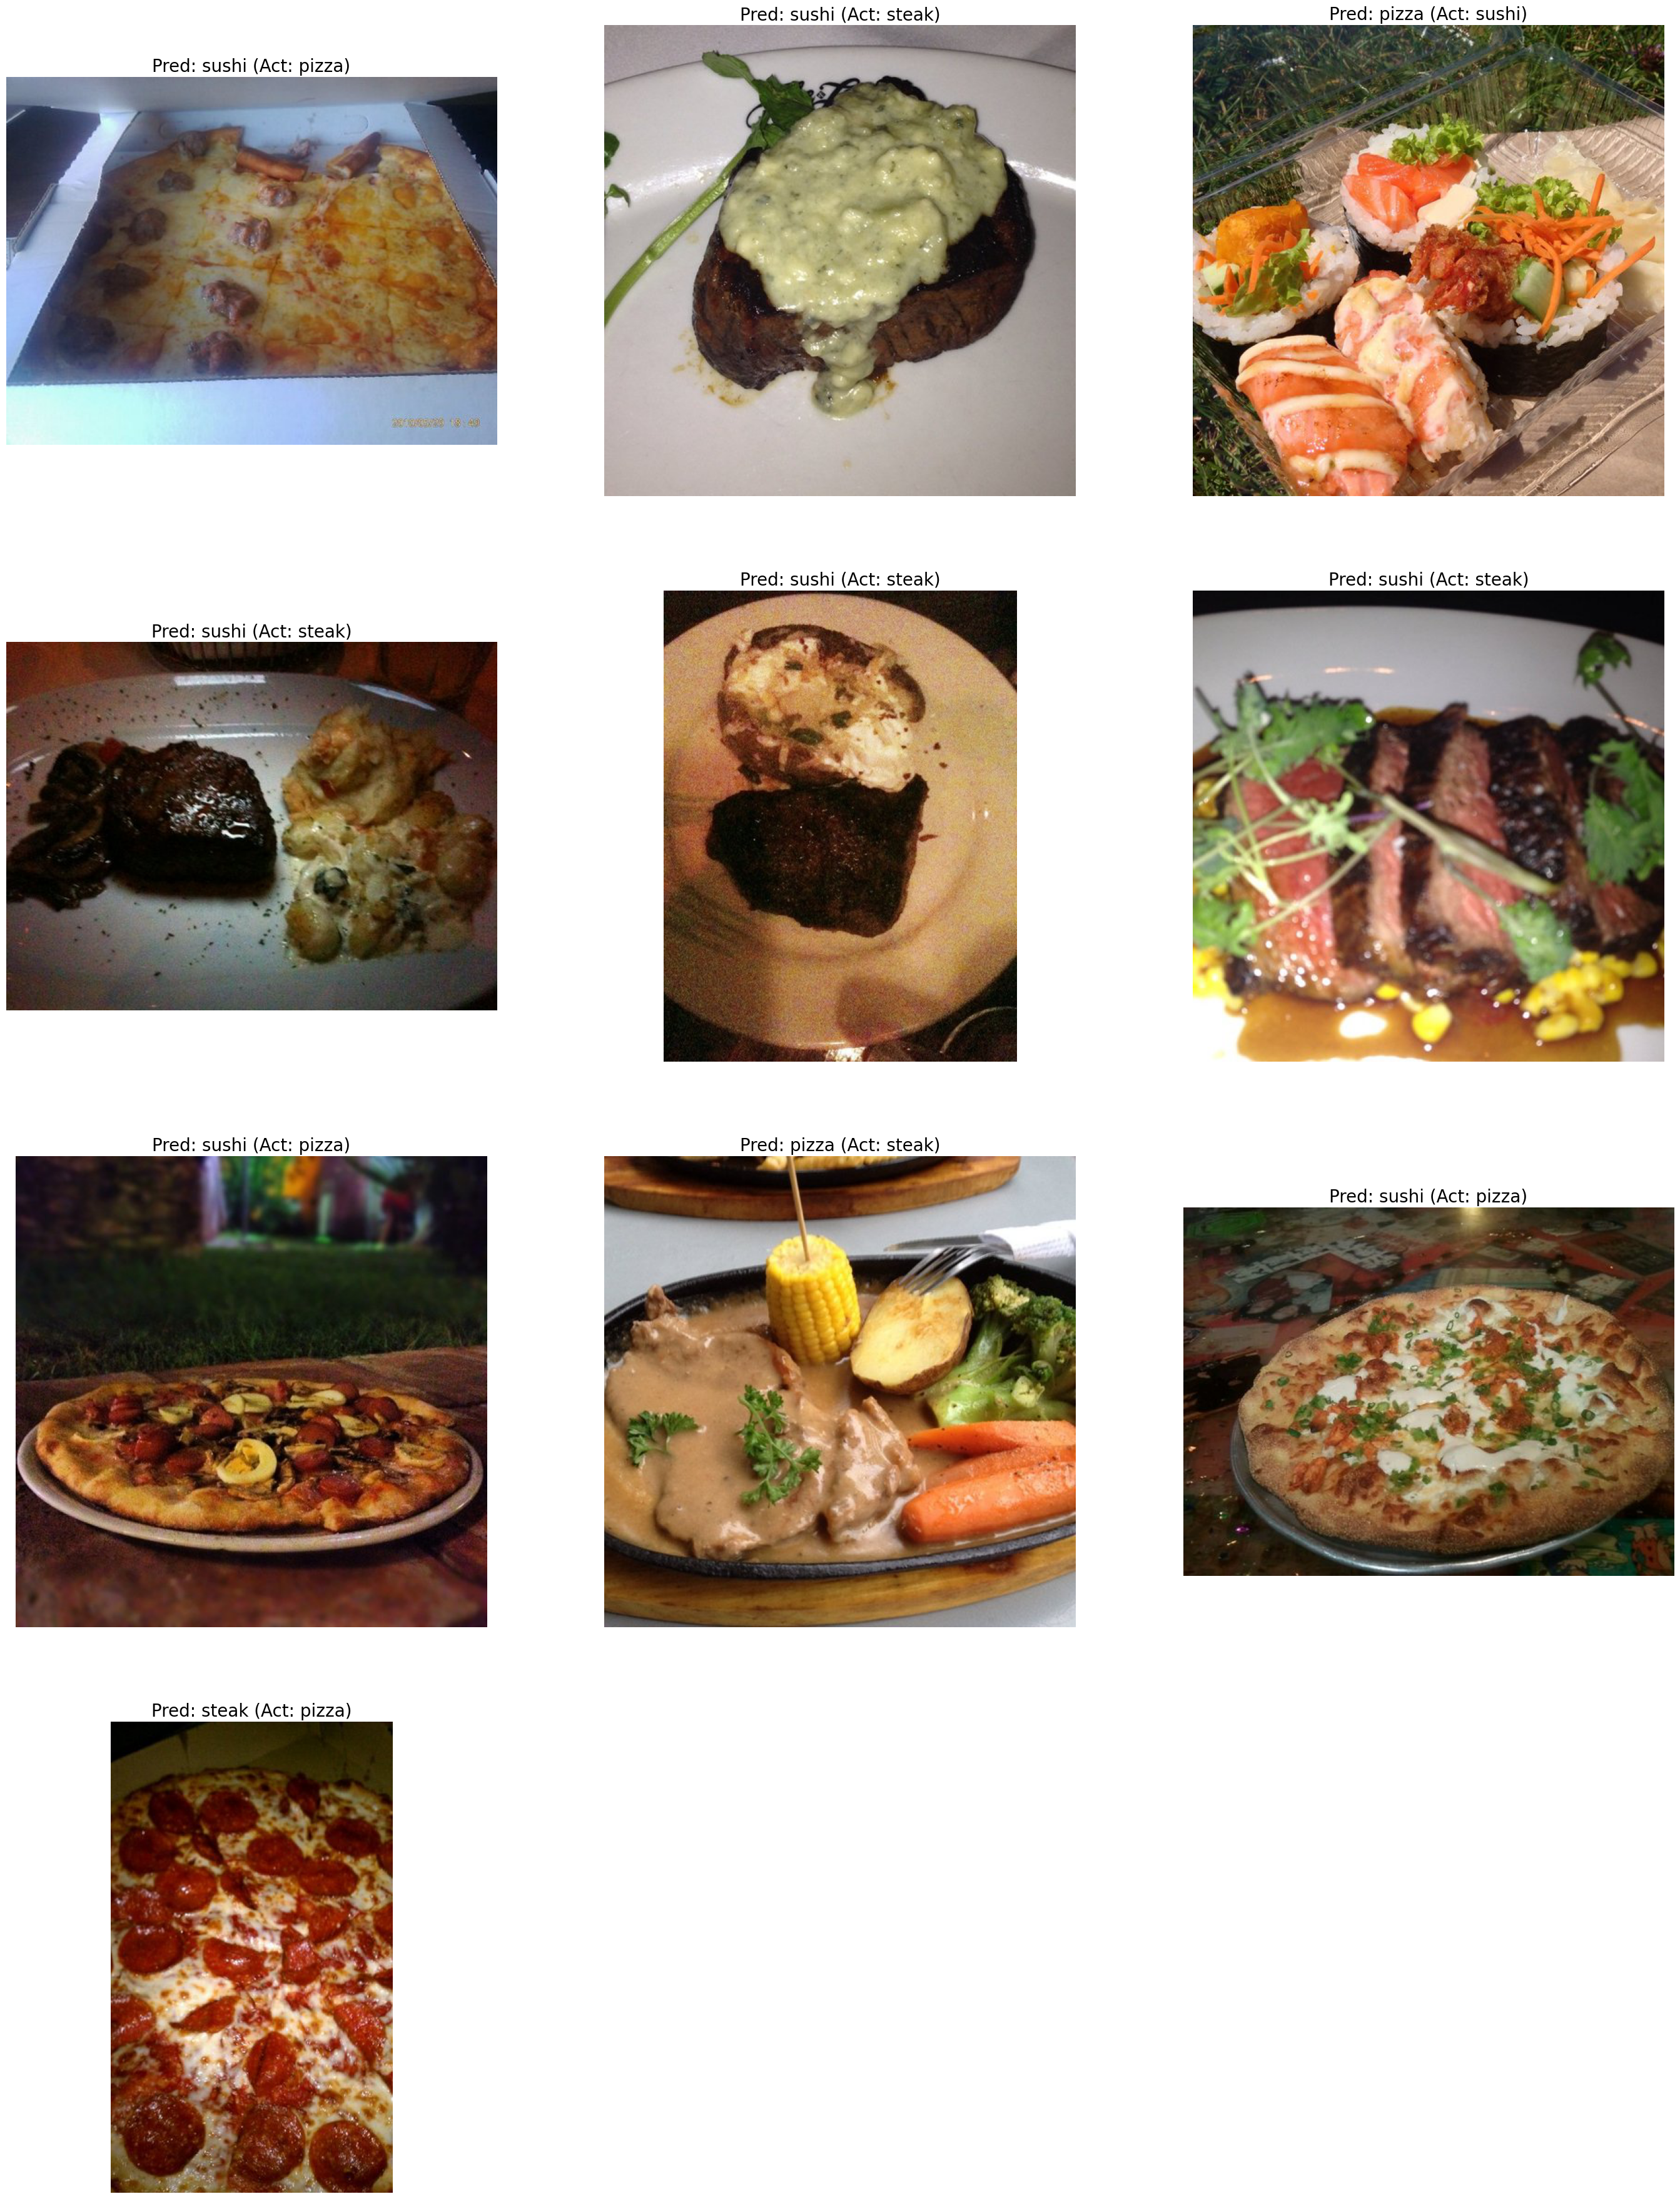

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from tkinter import Tk

# Create data loaders
_, test_dataloader, _ = data_setup.create_dataloaders(
    train_dir=train_dir_20p,
    test_dir=test_dir_20p,
    train_transform=pretrained_vit_transforms, # use manually created transforms
    test_transform=pretrained_vit_transforms,
    batch_size=BATCH_SIZE,
    num_workers=0,
)

def get_most_wrong_examples(model: torch.nn.Module,
                            test_dataloader: torch.utils.data.DataLoader,
                            num_samples:int=5,
                            plot_images:bool=True,
                            n_cols:int=5,
                            title_font_size:int=20,
                            device: torch.device = "cuda" if torch.cuda.is_available() else "cpu"
                            ):
    '''
    Returns the most wrong examples from a trained model
    Args:
        model: a trained model
        test_dataloader: a test dataloader
        num_samples: number of samples to return
        plot_images: whether to plot the images
        device: device to use for the model
    '''

    # Make predictions on test dataset
    model.eval()    
    y_preds = []
    y_probs = []

    model.eval()
    model.to(device)

    with torch.inference_mode():
        for X, y in tqdm(test_dataloader, desc="Making predictions"):

            # Send data and targets to target device
            X, y = X.to(device), y.to(device)
            
            # Do the forward pass
            y_logit = model(X)

            # Turn predictions from logits -> prediction probabilities -> predictions labels
            y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
            y_prob = torch.softmax(y_logit, dim=1).max(dim=1)[0]
            
            # Put predictions on CPU for evaluation
            y_preds.append(y_pred.cpu())
            y_probs.append(y_prob.cpu())

    # Concatenate list of predictions into a tensor
    test_pred_tensor = torch.cat(y_preds)
    test_prob_tensor = torch.cat(y_probs)

    # Convert tensors to lists
    y_preds = test_pred_tensor.tolist()
    y_probs = test_prob_tensor.tolist()

    sample = [i[0] for i in test_dataloader.dataset.imgs]
    label = [i[1] for i in test_dataloader.dataset.imgs]
    prediction = y_preds
    prob = y_probs

    len(sample), len(label), len(prediction), len(prob)
    df = pd.DataFrame({'sample': sample, 'label': label, 'prediction': prediction, 'prob': prob})
    df['match'] = df['label'] == df['prediction']
    df_wrong = df[df['match'] == False]
    df_wrong_sorted = df_wrong.sort_values(by='prob', ascending=False)
    df_top_wrong = df_wrong_sorted.head(num_samples)
    df_top_wrong.reset_index(inplace=True)

    num_samples = df_top_wrong.shape[0]

    if plot_images or num_samples == 0:
                  
        class_names_ = test_dataloader.dataset.classes

        n_rows = int(num_samples/n_cols) + 1

        root = Tk()
        screen_width_px = root.winfo_screenwidth()
        dpi = plt.rcParams['figure.dpi']
        screen_width_in = screen_width_px / dpi

        _, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(screen_width_in, screen_width_in*n_rows // n_cols))
        for i in range(n_rows):
            for j in range(n_cols):
                idx = i*n_cols+j 
                if idx >= num_samples:
                    axes[i, j].set_visible(False)
                else:
                    img = plt.imread(df_top_wrong.loc[idx, 'sample'])
                    axes[i, j].imshow(img)
                    predicted = df_top_wrong.loc[idx, 'prediction']
                    predicted_class = class_names_[predicted]
                    actual = df_top_wrong.loc[idx, 'label']
                    actual_class = class_names_[actual]
                    axes[i, j].set_title(f"Pred: {predicted_class} (Act: {actual_class})", fontsize=title_font_size)
                    axes[i, j].axis('off')

    return df_top_wrong

df_top_wrong = helper_functions.get_most_wrong_examples(model=pretrained_vit,
                                                        test_dataloader=test_dataloader,
                                                        num_samples=10,
                                                        n_cols=3,
                                                        title_font_size=20,
                                                        device=device)

In [15]:
df_top_wrong.shape

(10, 6)

# 5. Our custom ViT model architecture closely mimics that of the ViT paper, however, our training recipe misses a few things. 
* Research some of the following topics from Table 3 in the ViT paper that we miss and write a sentence about each and how it might help with training:
    * **ImageNet-21k pretraining** 
    * **Learning rate warmup** 
    * **Learning rate decay** 
    * **Gradient clipping** 

# 5. Our custom ViT model architecture closely mimics that of the ViT paper, however, our training recipe misses a few things. 
* Research some of the following topics from Table 3 in the ViT paper that we miss and write a sentence about each and how it might help with training:
    * **ImageNet-22k pretraining** (more data) - Train a model on a large corpus of images (14 million in the case of ImageNet-22k) with 22,000 classes so it can learn a good underlying representation of images that can be applied to other problems.
    * **Learning rate warmup** - start with a small learning rate (almost 0) and warm it up to a desired value (e.g. 1e-3) to prevent a model's loss from exploding during the start of training.
    * **Learning rate decay** - slowly lower learning rate overtime so a model's loss doesn't explode when it's close to convergence (like reaching for a coin at the back of a couch, the closer you get to the coin, the small steps you take).
    * **Gradient clipping** - reduce a model's gradients by a certain amount to prevent them from getting too large and causes the loss to explode.

All of the above are ways to prevent overfitting (regularization) and in the case of ImageNet-22k pretraining, it also helps to prevent underfitting (apply learned patterns from another dataset to your own for better performance). 